# **IMPORT PACKAGE**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
pd.set_option('display.max_columns', None)

# **Data For Clustering**

In [ ]:
path_1 = "https://raw.githubusercontent.com/brainspopper/dataset/main/clustering_data.csv"
data = pd.read_csv(path_1)

In [ ]:
data.dtypes

,0
GCIF,object
Area,object
Jalur_Pembukaan,object
Vintage,object
Usia,float64
Jenis_Kelamin,object
Status_Perkawinan,object
Jumlah_Anak,int64
Pendidikan,object
Produk_Tabungan,int64


In [ ]:
total_data = data.shape  # (jumlah baris, jumlah kolom)
print("Jumlah baris:", total_data[0])
print("Jumlah kolom:", total_data[1])


Jumlah baris: 28129
Jumlah kolom: 18


# **Data Understanding**

In [ ]:
data.groupby(('Area'))['Area'].count()

,Area
Area,
Bandung,6917
Bogor,1191
Jakarta,7017
Jogja,3001
Solo,5001
Surabaya,5002


In [ ]:
data.groupby('Area').mean(numeric_only=True)

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Area,,,,,,,,,,,
Bandung,42.562310,1.296516,0.925401,0.599682,0.329767,0.587393,0.163076,0.537516,3.142836,405.124910,2.454722e+08
Bogor,42.660451,1.366919,0.921075,0.596977,0.324097,0.582704,0.160369,0.554996,3.140218,402.227540,2.499853e+08
Jakarta,42.696995,1.322930,0.925467,0.603534,0.336184,0.590708,0.169873,0.540829,3.166595,406.478552,2.485876e+08
Jogja,42.512422,1.309897,0.934355,0.608464,0.333555,0.594469,0.158614,0.535155,3.164612,402.694768,2.496616e+08
Solo,42.445452,1.270746,0.922416,0.603479,0.337932,0.604679,0.156969,0.540492,3.165967,408.010198,2.507478e+08
Surabaya,42.768980,1.284486,0.927629,0.608357,0.329668,0.585566,0.168533,0.528589,3.148341,409.074370,2.523277e+08


In [ ]:
data.groupby(('Vintage'))['Vintage'].count()

,Vintage
Vintage,
2 - 3 Tahun,13953
< 1 Tahun,9278
> 4 Tahun,4898


In [ ]:
data.groupby(('Vintage')).mean(numeric_only=True)

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Vintage,,,,,,,,,,,
2 - 3 Tahun,42.578850,1.291694,0.927256,0.607755,0.328531,0.589336,0.163764,0.539311,3.155952,407.679639,2.489367e+08
< 1 Tahun,42.689341,1.294676,0.931235,0.592585,0.336495,0.594201,0.164798,0.523389,3.142703,395.611231,2.486679e+08
> 4 Tahun,42.571866,1.338301,0.912822,0.613107,0.338914,0.592691,0.163536,0.560637,3.181707,422.593508,2.500646e+08


In [ ]:
data.groupby(('Jalur_Pembukaan'))['Jalur_Pembukaan'].count()

,Jalur_Pembukaan
Jalur_Pembukaan,
Aplikasi Digital,6216
Cabang,5856
Internet Banking,5795
Telemarketing,10262


In [ ]:
data.groupby(('Jalur_Pembukaan')).mean(numeric_only=True)

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Jalur_Pembukaan,,,,,,,,,,,
Aplikasi Digital,42.442089,1.292149,0.930180,0.598456,0.323681,0.593147,0.165541,0.535714,3.146718,405.278314,2.489950e+08
Cabang,42.560627,1.308743,0.924180,0.610143,0.325478,0.583675,0.153518,0.544740,3.141735,409.923156,2.456661e+08
Internet Banking,42.723992,1.302502,0.928387,0.597929,0.347368,0.598965,0.169802,0.531493,3.173943,406.593270,2.517532e+08
Telemarketing,42.676514,1.300526,0.923309,0.606412,0.334730,0.590821,0.165952,0.538589,3.159813,404.674527,2.494725e+08


In [ ]:
data.groupby(('Status_Perkawinan'))['Status_Perkawinan'].count()

,Status_Perkawinan
Status_Perkawinan,
Belum Menikah,8168
Cerai,4077
Janda/Duda,4045
Menikah,11839


In [ ]:
data.groupby(('Status_Perkawinan')).mean(numeric_only=True)

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Status_Perkawinan,,,,,,,,,,,
Belum Menikah,39.571621,0.000000,1.000000,0.596107,0.333374,0.331660,0.160749,0.499633,2.921523,420.636141,2.423448e+08
Cerai,50.226883,2.003679,1.000000,0.607555,0.337258,0.509688,0.172676,0.389747,3.016924,426.269070,2.393499e+08
Janda/Duda,NaN,1.201978,1.000000,0.609889,0.337948,0.597281,0.161187,0.401731,3.108035,289.648208,2.474754e+08
Menikah,42.084467,1.989948,0.824309,0.605457,0.329504,0.797027,0.164372,0.661542,3.382211,429.378833,2.575412e+08


# **Data Preparation**

## Pengecekan Data Duplikat dan *Missing Data*

In [ ]:
data.isnull().sum()

,0
GCIF,0
Area,0
Jalur_Pembukaan,0
Vintage,0
Usia,4045
Jenis_Kelamin,0
Status_Perkawinan,0
Jumlah_Anak,0
Pendidikan,0
Produk_Tabungan,0


In [ ]:
missing_percentage = data.isnull().mean() * 100
print(missing_percentage)

GCIF                           0.000000
Area                           0.000000
Jalur_Pembukaan                0.000000
Vintage                        0.000000
Usia                          14.380177
Jenis_Kelamin                  0.000000
Status_Perkawinan              0.000000
Jumlah_Anak                    0.000000
Pendidikan                     0.000000
Produk_Tabungan                0.000000
Produk_Deposito                0.000000
Produk_Kartu_Kredit            0.000000
Produk_Kredit_Rumah            0.000000
Produk_Kredit_Kendaraan        0.000000
Produk_Kredit_Dana_Tunai       0.000000
Total_Kepemilikan_Produk       0.000000
Pendapatan_Tahunan             0.000000
Total_Relationship_Balance     0.000000
dtype: float64


In [ ]:
import matplotlib.pyplot as plt


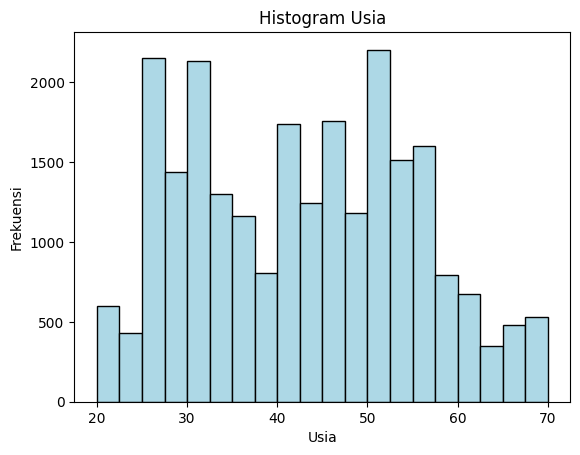

In [ ]:
plt.hist(data['Usia'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
data.Usia.median()

43.0

In [ ]:
data = data.copy()
data['Usia'] = data.Usia.fillna(data.Usia.median())
data['Usia'].isna().sum()

0

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
GCIF,0
Area,0
Jalur_Pembukaan,0
Vintage,0
Usia,0
Jenis_Kelamin,0
Status_Perkawinan,0
Jumlah_Anak,0
Pendidikan,0
Produk_Tabungan,0


In [ ]:
data.duplicated().sum()

0

## Pengecekan Data Outlier

In [ ]:
data.count()

,0
GCIF,28129
Area,28129
Jalur_Pembukaan,28129
Vintage,28129
Usia,28129
Jenis_Kelamin,28129
Status_Perkawinan,28129
Jumlah_Anak,28129
Pendidikan,28129
Produk_Tabungan,28129


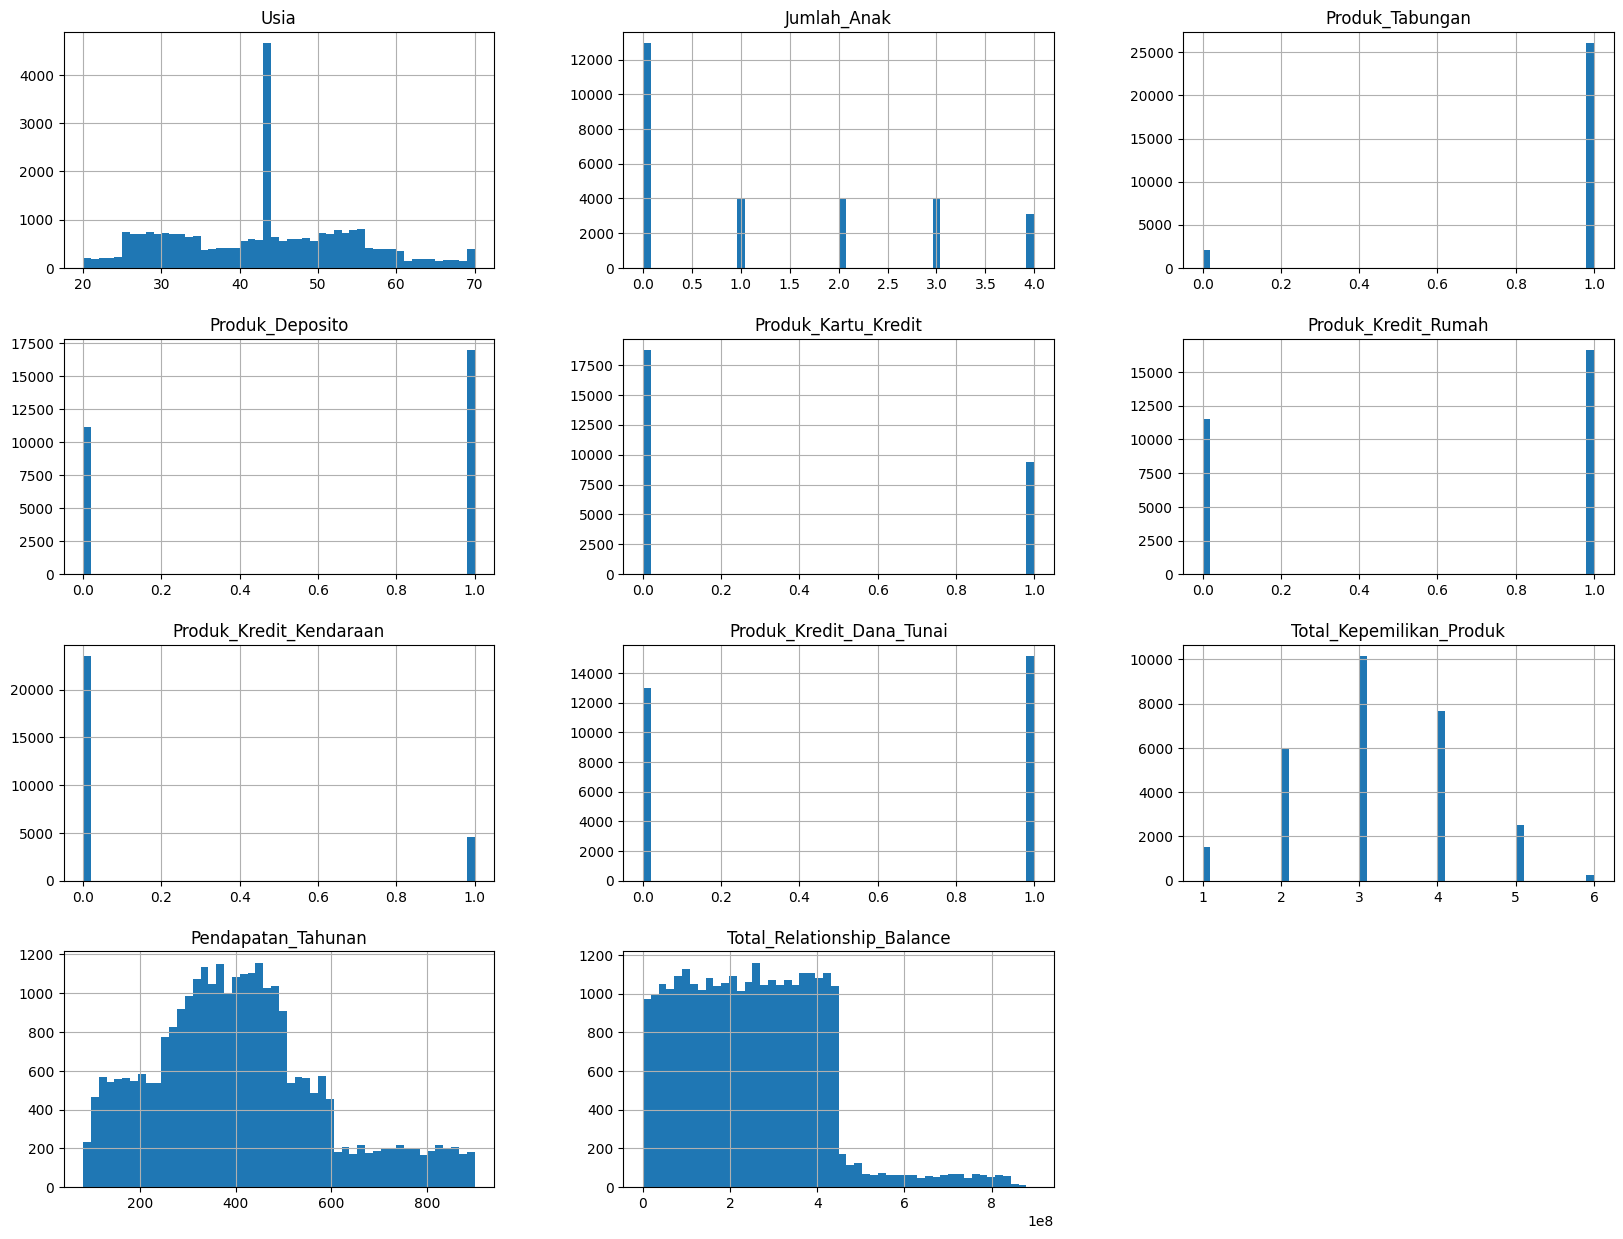

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot histogram of numerical variables
data.hist(bins=50, figsize=(20,15))
plt.show();

In [ ]:
numerical = data.select_dtypes(include=['int64', 'float64']).columns
len(numerical)

11

IndexError: index 3 is out of bounds for axis 0 with size 3

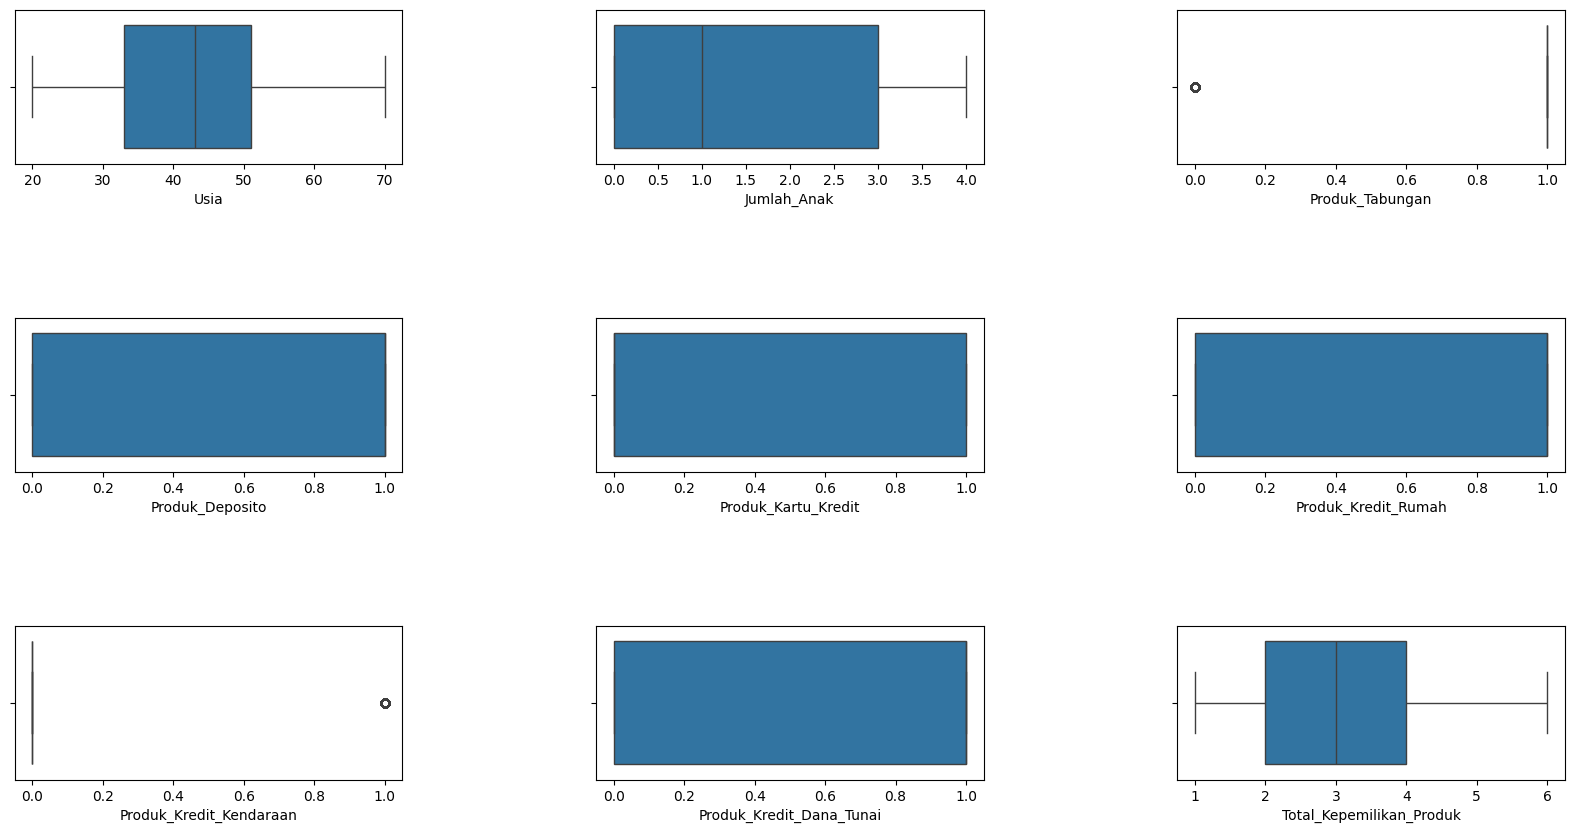

In [ ]:
#plot boxplot for each numerical variables

#plot numerical data (Classification Task)
# Plot KDE 1 Tiap Feature
numerical = data.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(3,3,figsize = (20,10))
fig.subplots_adjust(hspace=1, wspace=0.5)
row = 0
cols = 0

for item in numerical:
    if cols > 2:
        cols = 0
        row += 1
    ax = sns.boxplot(x=item,data=data ,ax=axes[row, cols])
    ax.set_ylabel("")
    cols += 1

In [ ]:
# Mendeteksi dan mengatasi outliers (contoh dengan Z-Score)
from scipy import stats
z_scores = stats.zscore(data[['Usia', 'Pendapatan_Tahunan', 'Total_Relationship_Balance']])
print(z_scores)

           Usia  Pendapatan_Tahunan  Total_Relationship_Balance
0      2.303554            1.889968                   -1.573724
1     -1.720367           -1.155468                   -1.506578
2     -1.108031           -0.700594                    0.316209
3      0.204117            0.137040                    1.063093
4     -0.758125           -1.233130                    1.292661
...         ...                 ...                         ...
28124  0.379070           -0.234626                    2.222746
28125 -0.408219           -0.312287                    3.258852
28126  1.341312           -0.229079                    2.405397
28127  0.029164           -1.005693                    1.103000
28128  0.029164           -1.216488                   -0.594915

[28129 rows x 3 columns]


In [ ]:
data = data[(z_scores < 3).all(axis=1)]  # Menghapus data dengan Z-Score lebih dari 3

In [ ]:
data.count()

,0
GCIF,27698
Area,27698
Jalur_Pembukaan,27698
Vintage,27698
Usia,27698
Jenis_Kelamin,27698
Status_Perkawinan,27698
Jumlah_Anak,27698
Pendidikan,27698
Produk_Tabungan,27698


## Filtering Data Telemarketing Only

In [ ]:
data0 = data[data['Jalur_Pembukaan']=='Telemarketing']

In [ ]:
data0

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
7,G13193,Solo,Telemarketing,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
8,G09296,Jakarta,Telemarketing,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
9,G09228,Jakarta,Telemarketing,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28110,G18289,Jakarta,Telemarketing,2 - 3 Tahun,43.0,Perempuan,Janda/Duda,3,Tidak Sekolah Formal,1,1,0,1,1,1,5,292,301029945
28111,G18990,Surabaya,Telemarketing,2 - 3 Tahun,43.0,Laki-laki,Janda/Duda,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,95,588719805
28113,G19601,Jakarta,Telemarketing,2 - 3 Tahun,43.0,Laki-laki,Janda/Duda,0,Tidak Sekolah Formal,1,1,1,0,1,1,5,472,121543656
28119,G08939,Solo,Telemarketing,2 - 3 Tahun,33.0,Laki-laki,Menikah,2,Tidak Sekolah Formal,1,1,1,1,1,1,6,366,146178244


In [ ]:
data0 = data0.drop(columns=['GCIF','Jalur_Pembukaan']).reset_index(drop=True)

In [ ]:
data0 = data0.reset_index()

In [ ]:
data0

,index,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
1,1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
2,2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
3,3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
4,4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10083,10083,Jakarta,2 - 3 Tahun,43.0,Perempuan,Janda/Duda,3,Tidak Sekolah Formal,1,1,0,1,1,1,5,292,301029945
10084,10084,Surabaya,2 - 3 Tahun,43.0,Laki-laki,Janda/Duda,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,95,588719805
10085,10085,Jakarta,2 - 3 Tahun,43.0,Laki-laki,Janda/Duda,0,Tidak Sekolah Formal,1,1,1,0,1,1,5,472,121543656
10086,10086,Solo,2 - 3 Tahun,33.0,Laki-laki,Menikah,2,Tidak Sekolah Formal,1,1,1,1,1,1,6,366,146178244


## Pembagian Dataset Experiment
1. Experiment 0 --> Semua Variabel Digunakan
2. Experiment 1 --> Menggunakan Demographics
3. Experiment 2 --> Menggunakan Financial Related Variable

In [ ]:
data1 = data0.iloc[:,1:8]

In [ ]:
data1

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor
1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor
2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor
3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor
4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor
...,...,...,...,...,...,...,...
10083,Jakarta,2 - 3 Tahun,43.0,Perempuan,Janda/Duda,3,Tidak Sekolah Formal
10084,Surabaya,2 - 3 Tahun,43.0,Laki-laki,Janda/Duda,0,Tidak Sekolah Formal
10085,Jakarta,2 - 3 Tahun,43.0,Laki-laki,Janda/Duda,0,Tidak Sekolah Formal
10086,Solo,2 - 3 Tahun,33.0,Laki-laki,Menikah,2,Tidak Sekolah Formal


In [ ]:
data2 = data0.iloc[:,8:17]

In [ ]:
data2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...
10083,1,1,0,1,1,1,5,292,301029945
10084,1,1,1,1,0,1,5,95,588719805
10085,1,1,1,0,1,1,5,472,121543656
10086,1,1,1,1,1,1,6,366,146178244


## Melakukan Encoding untuk Data Category

In [ ]:
data1 = pd.get_dummies(data0, columns=['Area', 'Jenis_Kelamin', 'Status_Perkawinan', 'Pendidikan', 'Vintage'])

In [ ]:
data1

,index,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,...,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,0,23.0,0,1,0,0,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
1,1,30.0,0,1,0,0,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
2,2,29.0,0,1,0,0,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
3,3,49.0,0,1,0,0,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
4,4,21.0,0,1,0,0,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10083,10083,43.0,3,1,1,0,1,1,1,5,...,False,False,False,False,False,False,True,True,False,False
10084,10084,43.0,0,1,1,1,1,0,1,5,...,False,False,False,False,False,False,True,True,False,False
10085,10085,43.0,0,1,1,1,0,1,1,5,...,False,False,False,False,False,False,True,True,False,False
10086,10086,33.0,2,1,1,1,1,1,1,6,...,False,False,False,False,False,False,True,True,False,False


## Standardisasi Data Numerik

In [ ]:
predname_num = data2.columns
predname_num

Index(['Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit',
       'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
X_num = pd.DataFrame(pt.fit_transform(data2))
X_num.head()

,0,1,2,3,4,5,6,7,8
0,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-1.153786,-1.607110
1,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.696581,0.412559
2,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.612945,-1.145031
3,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,0.212255,0.048980
4,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.824821,-1.488643


In [ ]:
X_num.columns = predname_num
X_num.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-1.153786,-1.607110
1,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.696581,0.412559
2,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.612945,-1.145031
3,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,0.212255,0.048980
4,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.824821,-1.488643


## Pengecekan Korelasi

In [ ]:
corrtest1 = data1.corr().abs()
corrtest2 = X_num.corr().abs()
print(corrtest1)
print(corrtest2)


                                    index      Usia  Jumlah_Anak  \
index                            1.000000  0.018666     0.000092   
Usia                             0.018666  1.000000     0.100524   
Jumlah_Anak                      0.000092  0.100524     1.000000   
Produk_Tabungan                  0.007833  0.527891     0.127484   
Produk_Deposito                  0.028698  0.003219     0.005355   
Produk_Kartu_Kredit              0.016656  0.025593     0.003419   
Produk_Kredit_Rumah              0.019560  0.039181     0.212141   
Produk_Kredit_Kendaraan          0.000711  0.008714     0.006280   
Produk_Kredit_Dana_Tunai         0.020008  0.034582     0.054536   
Total_Kepemilikan_Produk         0.041808  0.118227     0.092963   
Pendapatan_Tahunan               0.009589  0.507937     0.000062   
Total_Relationship_Balance       0.008437  0.015613     0.005481   
Area_Bandung                     0.006665  0.014044     0.009537   
Area_Bogor                       0.002130  0.009

In [ ]:
# Membuang Nilai Redundan Pada Matriks
upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(bool))  # Ganti np.bool dengan bool
upper1 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(bool))  # Ganti np.bool dengan bool

# Mencari Nilai Yang Berkorelasi di atas 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop1 = [column for column in upper1.columns if any(upper1[column] > 0.7)]

# Menghapus Kolom Yang Berkorelasi di atas 0.7
data1 = data1.drop(to_drop, axis=1)
data2 = data2.drop(to_drop1, axis=1)

In [ ]:
data1

,index,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,...,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,0,23.0,0,1,0,0,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
1,1,30.0,0,1,0,0,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
2,2,29.0,0,1,0,0,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
3,3,49.0,0,1,0,0,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
4,4,21.0,0,1,0,0,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10083,10083,43.0,3,1,1,0,1,1,1,5,...,False,False,False,False,False,False,True,True,False,False
10084,10084,43.0,0,1,1,1,1,0,1,5,...,False,False,False,False,False,False,True,True,False,False
10085,10085,43.0,0,1,1,1,0,1,1,5,...,False,False,False,False,False,False,True,True,False,False
10086,10086,33.0,2,1,1,1,1,1,1,6,...,False,False,False,False,False,False,True,True,False,False


In [ ]:
X_num

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-1.153786,-1.607110
1,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.696581,0.412559
2,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.612945,-1.145031
3,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,0.212255,0.048980
4,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.824821,-1.488643
...,...,...,...,...,...,...,...,...,...
10083,0.290284,0.815452,-0.695833,0.842514,2.292201,0.936955,1.808135,-0.629672,0.426242
10084,0.290284,0.815452,1.437125,0.842514,-0.436262,0.936955,1.808135,-1.728081,2.440885
10085,0.290284,0.815452,1.437125,-1.186923,2.292201,0.936955,1.808135,0.373950,-0.830670
10086,0.290284,0.815452,1.437125,0.842514,2.292201,0.936955,2.773188,-0.217072,-0.658158


Gabungan Keduanya

In [ ]:
data_combined = pd.concat([data1, X_num], axis=1, join='inner')
data_combined



,index,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,...,Vintage_> 4 Tahun,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0,23.0,0,1,0,0,0,0,0,1,...,False,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-1.153786,-1.607110
1,1,30.0,0,1,0,0,0,0,0,1,...,False,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.696581,0.412559
2,2,29.0,0,1,0,0,0,0,0,1,...,False,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.612945,-1.145031
3,3,49.0,0,1,0,0,0,0,0,1,...,False,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,0.212255,0.048980
4,4,21.0,0,1,0,0,0,0,0,1,...,False,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.824821,-1.488643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10083,10083,43.0,3,1,1,0,1,1,1,5,...,False,0.290284,0.815452,-0.695833,0.842514,2.292201,0.936955,1.808135,-0.629672,0.426242
10084,10084,43.0,0,1,1,1,1,0,1,5,...,False,0.290284,0.815452,1.437125,0.842514,-0.436262,0.936955,1.808135,-1.728081,2.440885
10085,10085,43.0,0,1,1,1,0,1,1,5,...,False,0.290284,0.815452,1.437125,-1.186923,2.292201,0.936955,1.808135,0.373950,-0.830670
10086,10086,33.0,2,1,1,1,1,1,1,6,...,False,0.290284,0.815452,1.437125,0.842514,2.292201,0.936955,2.773188,-0.217072,-0.658158


# **Modeling & Evaluation**

Pembangunan model akan menggunakan 2 algoritma:
1. K-Means
2. K-Medoid

dengan pengecekan silhouette score


## K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

Experiment 0

In [ ]:
# Variasi hyperparameter (jumlah cluster)
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_combined)
    silhouette_avg = silhouette_score(data_combined, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp0_'+str(n_clusters)] = cluster_labels



Silhouette Score (K-Means) -3 : 0.5660705027528435
Silhouette Score (K-Means) -4 : 0.5339315113743304
Silhouette Score (K-Means) -5 : 0.5667874975969415


Experiment 1

In [ ]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp1_'+str(n_clusters)] = cluster_labels


Silhouette Score (K-Means) -3 : 0.5660705027528463
Silhouette Score (K-Means) -4 : 0.5339510874355019
Silhouette Score (K-Means) -5 : 0.5667874975969471


Experiment 2

In [ ]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_num)
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp2_'+str(n_clusters)] = cluster_labels


Silhouette Score (K-Means) -3 : 0.1421695894677265
Silhouette Score (K-Means) -4 : 0.1448835531535123
Silhouette Score (K-Means) -5 : 0.1545479345644131


## K-Medoids

In [ ]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.1 MB/s eta 0:00:00


In [ ]:
from sklearn_extra.cluster import KMedoids

Experiment 0

In [ ]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(data_combined)
    silhouette_avg = silhouette_score(data_combined, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMedoids_Exp0_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.564548989734487
Silhouette Score (K-Medoids) -4 : 0.5384881595695108
Silhouette Score (K-Medoids) -5 : 0.5178911534722299


Experiment 1

In [ ]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMedoids_Exp1_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.5645489897344899
Silhouette Score (K-Medoids) -4 : 0.5384881595695165
Silhouette Score (K-Medoids) -5 : 0.5178911534722382


Experiment 2

In [ ]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(X_num)
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMedoids_Exp2_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.10211031255818362
Silhouette Score (K-Medoids) -4 : 0.09268373855137982
Silhouette Score (K-Medoids) -5 : 0.07992488937066845


# Analisa Hasil

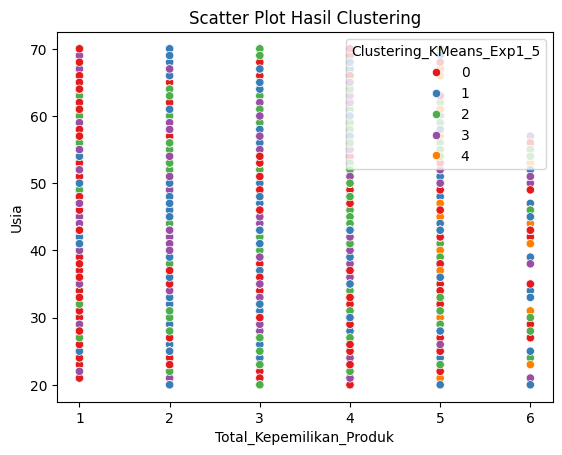

In [ ]:
    sns.scatterplot(data=data0, x='Usia', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_5', palette='Set1')
    plt.title('Scatter Plot Hasil Clustering')
    plt.show()

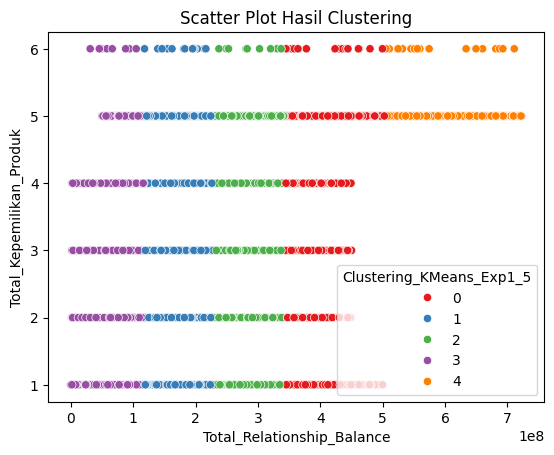

In [ ]:
    sns.scatterplot(data=data0, x='Total_Relationship_Balance', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_5', palette='Set1')
    plt.title('Scatter Plot Hasil Clustering')
    plt.show()

In [ ]:
cluster_means = data0[['Total_Relationship_Balance','Jumlah_Anak','Produk_Tabungan','Produk_Deposito','Produk_Kartu_Kredit','Produk_Kredit_Rumah','Produk_Kredit_Kendaraan','Produk_Kredit_Dana_Tunai','Total_Kepemilikan_Produk','Usia','Clustering_KMeans_Exp1_5']].groupby('Clustering_KMeans_Exp1_5').mean()
print(cluster_means)
pd

                          Total_Relationship_Balance  Jumlah_Anak  \
Clustering_KMeans_Exp1_5                                            
0                                       4.005013e+08     1.268195   
1                                       1.724593e+08     1.256877   
2                                       2.844070e+08     1.323553   
3                                       5.986474e+07     1.322153   
4                                       6.072636e+08     1.503846   

                          Produk_Tabungan  Produk_Deposito  \
Clustering_KMeans_Exp1_5                                     
0                                0.913148         0.593888   
1                                0.919903         0.601537   
2                                0.925020         0.594540   
3                                0.924224         0.576812   
4                                0.988462         0.934615   

                          Produk_Kartu_Kredit  Produk_Kredit_Rumah  \
Clustering_

<module 'pandas' from '/usr/local/lib/python3.10/dist-packages/pandas/__init__.py'>

Group 0

In [ ]:
data0[data0['Clustering_KMeans_Exp1_5']==0][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2487.000000,2487.000000,2487.000000,2.487000e+03
mean,42.509449,1.268195,3.108967,4.005013e+08
std,11.752844,1.440160,1.078099,3.542711e+07
min,20.000000,0.000000,1.000000,3.424468e+08
25%,32.000000,0.000000,2.000000,3.710910e+08
50%,43.000000,1.000000,3.000000,3.987620e+08
75%,51.000000,2.000000,4.000000,4.283717e+08
max,70.000000,4.000000,6.000000,5.025892e+08


In [ ]:
data0[data0['Clustering_KMeans_Exp1_5']==0]['Area'].value_counts(normalize=True)

,proportion
Area,
Jakarta,0.463209
Bandung,0.174507
Surabaya,0.140732
Solo,0.117813
Jogja,0.077604
Bogor,0.026136


In [ ]:
data0[data0['Clustering_KMeans_Exp1_5']==0]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.484520
< 1 Tahun,0.340169
> 4 Tahun,0.175312


In [ ]:
data0[data0['Clustering_KMeans_Exp1_5']==0]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.266184
SMA,0.187374
SD,0.184560
Tidak Sekolah Formal,0.092481
Magister,0.091677
SMP,0.090068
Doktor,0.087656


In [ ]:
data0[data0['Clustering_KMeans_Exp1_5']==0]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.650583
Perempuan,0.349417


Group 1

In [ ]:
data0[data0['Clustering_KMeans_Exp1_5']==1][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2472.000000,2472.000000,2472.000000,2.472000e+03
mean,43.100324,1.256877,3.058657,1.724593e+08
std,11.518765,1.433806,0.977384,3.215903e+07
min,20.000000,0.000000,1.000000,1.161405e+08
25%,34.000000,0.000000,2.000000,1.449304e+08
50%,43.000000,1.000000,3.000000,1.716262e+08
75%,52.000000,2.000000,4.000000,2.004515e+08
max,70.000000,4.000000,6.000000,2.282997e+08


In [ ]:
data0[data0['Clustering_KMeans_Exp1_5']==1]['Area'].value_counts(normalize=True)

,proportion
Area,
Jakarta,0.470065
Bandung,0.176780
Surabaya,0.122573
Solo,0.120955
Jogja,0.079693
Bogor,0.029935


In [ ]:
data0[data0['Clustering_KMeans_Exp1_5']==1]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.509304
< 1 Tahun,0.313511
> 4 Tahun,0.177184


In [ ]:
data0[data0['Clustering_KMeans_Exp1_5']==1]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.275081
SD,0.186489
SMA,0.181634
Doktor,0.095874
Tidak Sekolah Formal,0.089806
Magister,0.086570
SMP,0.084547


In [ ]:
data0[data0['Clustering_KMeans_Exp1_5']==1]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.669094
Perempuan,0.330906


Group 2

In [ ]:
data0[data0['Clustering_KMeans_Exp1_5']==2][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2454.000000,2454.000000,2454.000000,2.454000e+03
mean,42.944988,1.323553,3.116952,2.844070e+08
std,11.435413,1.441776,0.977829,3.284585e+07
min,20.000000,0.000000,1.000000,2.283386e+08
25%,33.000000,0.000000,2.000000,2.560274e+08
50%,43.000000,1.000000,3.000000,2.840585e+08
75%,51.000000,3.000000,4.000000,3.132769e+08
max,70.000000,4.000000,6.000000,3.423450e+08


In [ ]:
data0[data0['Clustering_KMeans_Exp1_5']==1]['Area'].value_counts(normalize=True)

,proportion
Area,
Jakarta,0.470065
Bandung,0.176780
Surabaya,0.122573
Solo,0.120955
Jogja,0.079693
Bogor,0.029935


In [ ]:
data0[data0['Clustering_KMeans_Exp1_5']==1]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.509304
< 1 Tahun,0.313511
> 4 Tahun,0.177184


In [ ]:
data0[data0['Clustering_KMeans_Exp1_5']==1]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.275081
SD,0.186489
SMA,0.181634
Doktor,0.095874
Tidak Sekolah Formal,0.089806
Magister,0.086570
SMP,0.084547


In [ ]:
data0[data0['Clustering_KMeans_Exp1_5']==1]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.669094
Perempuan,0.330906


# **SARAN DAN KESIMPULAN**

## Saran

### **1. Kluster 0:**
   - **Profil:** Memiliki total balance sangat tinggi (sekitar 400 juta) dan rata-rata jumlah anak yang relatif kecil. Nasabah di kluster ini sudah banyak memiliki produk tabungan dan deposito.
   - **Strategi Penawaran Produk:**
     - **Deposito Premium:** Tingkatkan penawaran deposito dengan suku bunga kompetitif, mengingat mereka memiliki balance tinggi.
     - **Kartu Kredit dengan Limit Tinggi:** Tawarkan kartu kredit premium dengan limit yang lebih tinggi dan program rewards eksklusif untuk meningkatkan penggunaan.
     - **Kredit Rumah atau Kendaraan Mewah:** Dengan total balance yang tinggi, nasabah ini mungkin tertarik pada kredit rumah atau kredit kendaraan mewah.

### **2. Kluster 1:**
   - **Profil:** Memiliki total balance menengah (sekitar 172 juta) dan rata-rata jumlah anak mirip dengan kluster lain. Mereka dominan memiliki tabungan dan deposito, tetapi penggunaan kartu kredit dan kredit rumah masih rendah.
   - **Strategi Penawaran Produk:**
     - **Kredit Rumah:** Dorong kepemilikan kredit rumah dengan menawarkan skema pembiayaan yang terjangkau.
     - **Kartu Kredit dengan Promosi Menarik:** Tawarkan kartu kredit dengan cashback atau poin rewards untuk meningkatkan daya tarik.
     - **Deposito Berjangka:** Untuk nasabah yang mencari investasi aman, tawarkan deposito berjangka dengan bunga kompetitif.

### **3. Kluster 2:**
   - **Profil:** Total balance menengah ke atas (sekitar 284 juta), dengan rata-rata jumlah anak sedikit lebih tinggi dari kluster lainnya. Produk utama mereka adalah tabungan dan kredit rumah.
   - **Strategi Penawaran Produk:**
     - **Bundling Produk Tabungan dan Deposito:** Tawarkan bundling tabungan dan deposito untuk meningkatkan kepemilikan produk investasi yang aman.
     - **Kredit Kendaraan:** Kluster ini berpotensi untuk produk kredit kendaraan, terutama bagi mereka yang sudah memiliki rumah.
     - **Kartu Kredit dengan Limit Menengah:** Tawarkan kartu kredit dengan limit menengah dan program rewards yang berfokus pada kebutuhan sehari-hari.

### **4. Kluster 3:**
   - **Profil:** Memiliki total balance yang relatif rendah (sekitar 59 juta) dan jumlah anak yang sedikit lebih tinggi dari rata-rata. Produk utama mereka adalah tabungan dan kredit rumah, sedangkan kartu kredit kurang diminati.
   - **Strategi Penawaran Produk:**
     - **Kredit Kendaraan atau Kredit Dana Tunai:** Tawarkan kredit kendaraan atau dana tunai dengan suku bunga ringan, mengingat kluster ini mungkin memerlukan dukungan finansial untuk kebutuhan sehari-hari.
     - **Program Tabungan Berkelanjutan:** Berikan program menabung dengan setoran rutin yang otomatis untuk mendorong akumulasi balance.
     - **Kartu Kredit Dasar:** Tawarkan kartu kredit dengan limit rendah dan biaya tahunan minimal, terutama bagi nasabah yang belum memiliki kartu kredit.

### **5. Kluster 4:**
   - **Profil:** Memiliki total balance yang sangat tinggi (sekitar 607 juta) dengan jumlah anak yang lebih tinggi. Kluster ini memiliki ketertarikan tinggi pada semua produk, termasuk tabungan, deposito, kartu kredit, dan kredit rumah.
   - **Strategi Penawaran Produk:**
     - **Kredit Rumah Eksklusif:** Tawarkan produk kredit rumah dengan bunga khusus dan layanan tambahan, mengingat minat tinggi terhadap kredit rumah.
     - **Kartu Kredit Premium dengan Fasilitas Eksklusif:** Tawarkan kartu kredit premium yang memberikan akses ke program eksklusif, seperti lounge bandara atau cashback khusus.
     - **Kredit Kendaraan atau Dana Tunai dengan Suku Bunga Kompetitif:** Nasabah dengan total balance tinggi bisa jadi tertarik dengan produk kredit kendaraan atau kredit dana tunai yang memberikan fleksibilitas pembiayaan.

### **Kesimpulan:**
Dengan strategi yang disesuaikan seperti di atas, klien dapat menawarkan produk yang lebih relevan bagi setiap kluster nasabah:

1. **Kluster 0** – Fokus pada produk investasi, kredit rumah, dan kartu kredit premium.
2. **Kluster 1** – Fokus pada kredit rumah, deposito berjangka, dan kartu kredit dengan promosi menarik.
3. **Kluster 2** – Dorong kredit kendaraan dan bundling produk tabungan dan deposito.
4. **Kluster 3** – Utamakan kredit kendaraan atau dana tunai, serta kartu kredit dengan limit rendah.
5. **Kluster 4** – Sasar produk kredit rumah eksklusif, kartu kredit premium, dan kredit kendaraan atau dana tunai kompetitif.

Pendekatan ini akan membantu meningkatkan efektivitas penawaran produk dan menarik calon nasabah sesuai kebutuhan setiap kluster.